In [170]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

TIMEFRAME = (stock.Date >= "2018-01-01")

In [171]:
stock = pd.read_csv('AAPL.csv')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
...,...,...,...,...,...,...,...
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400
10833,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300
10834,2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500


C:\Users\Perso\AppData\Local\Temp\ipykernel_11212\190107793.py:10: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_cp.Date = date2num(pd.to_datetime(stock.Date).dt.to_pydatetime())


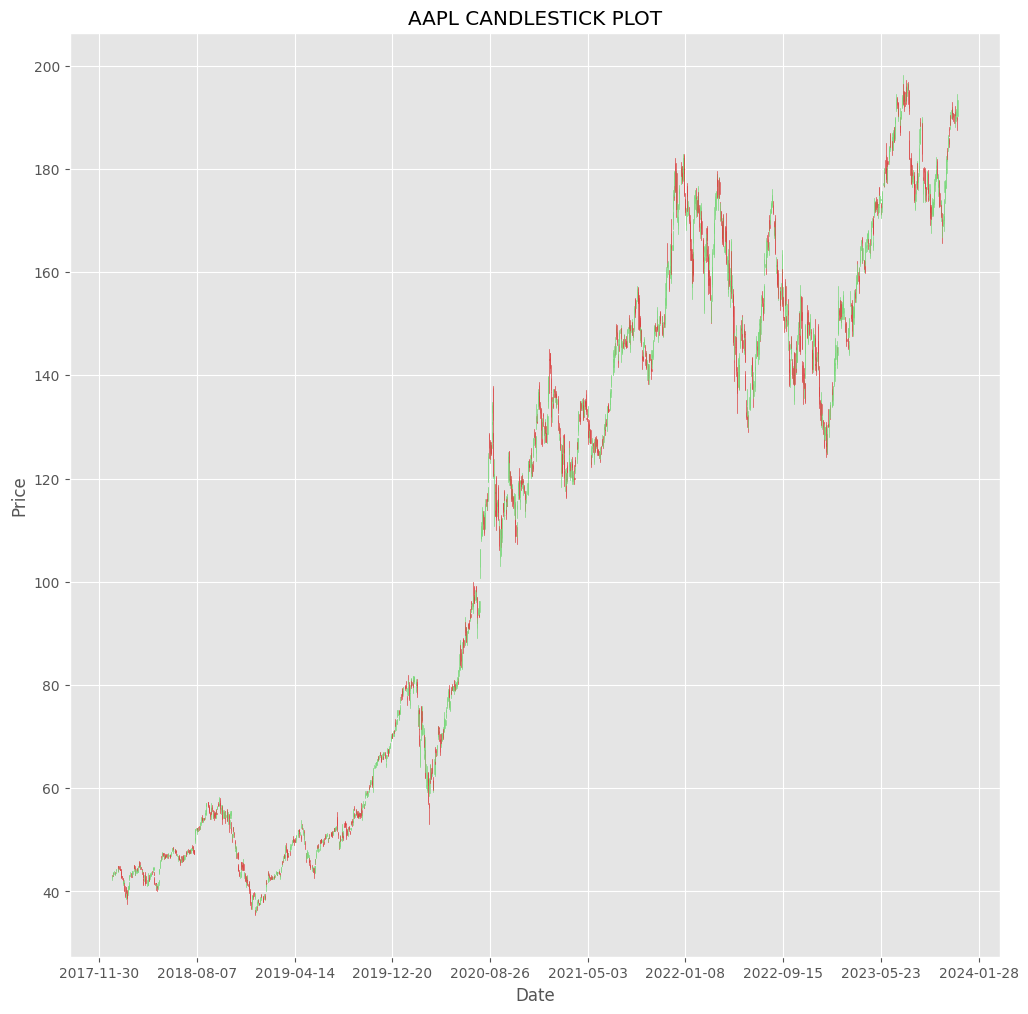

In [172]:
import matplotlib.ticker as mticker
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = stock[['Date', 'Open', 'High', 'Low', 'Close']].copy()
df_cp.Date = date2num(pd.to_datetime(stock.Date).dt.to_pydatetime())
df_cp = df_cp.loc[TIMEFRAME]

fig = plt.figure(figsize=(12, 12)) 
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=0.7)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL CANDLESTICK PLOT')
plt.show()


<Axes: >

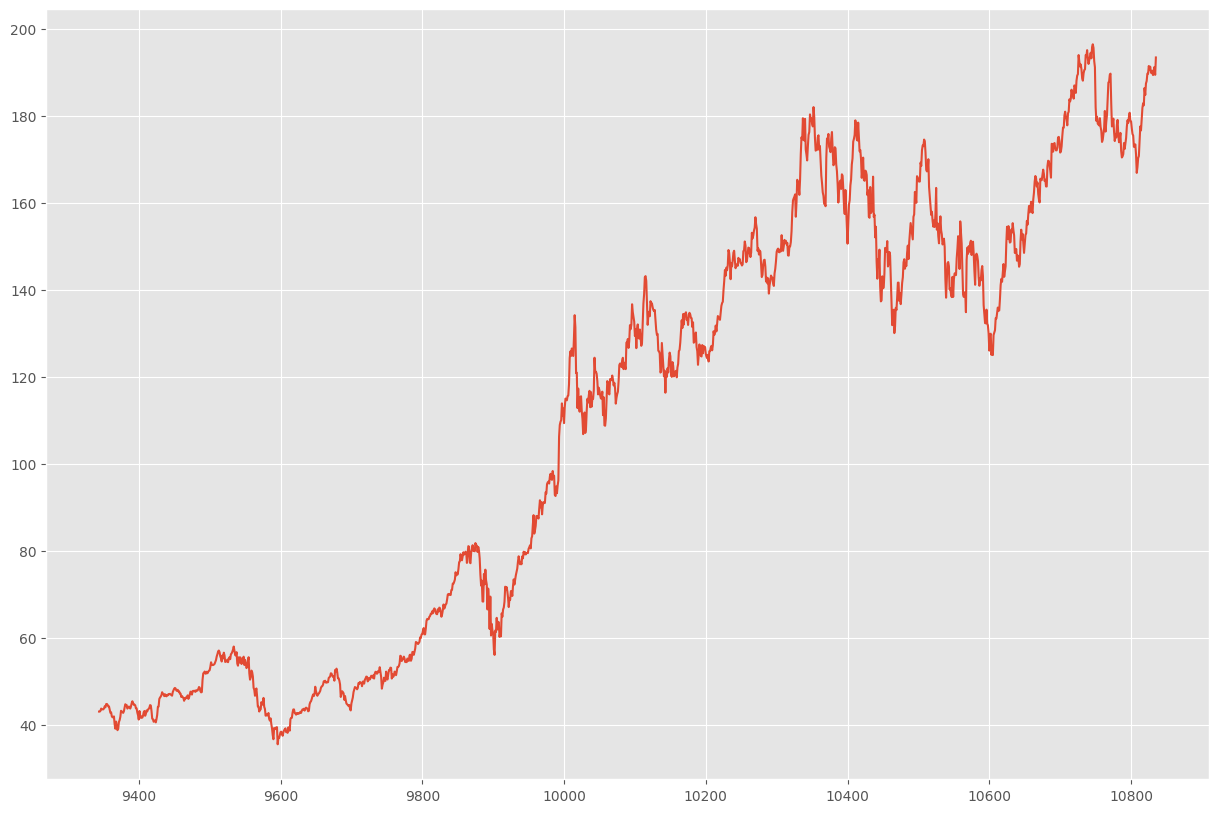

In [173]:
stock.loc[TIMEFRAME].Close.plot()

<Axes: >

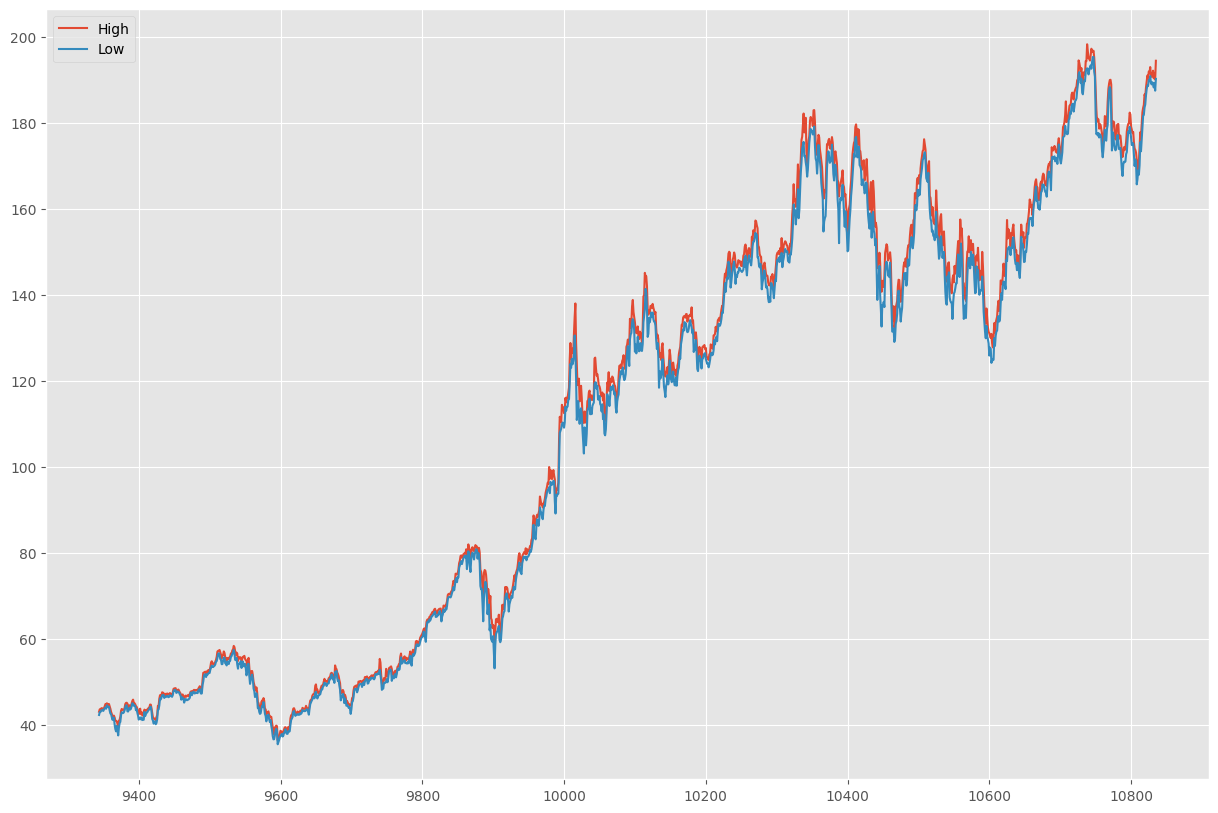

In [174]:
stock.loc[TIMEFRAME].plot(kind = "line", y = ['High', 'Low'])

In [175]:
stock_formatted = stock.loc[TIMEFRAME].copy()
stock_formatted['months'] = pd.DatetimeIndex(stock_formatted['Date']).month
stock_formatted['year'] = pd.DatetimeIndex(stock_formatted['Date']).year
stock_formatted.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,months,year
10702,2023-05-25,172.410004,173.899994,171.690002,172.990005,172.529419,56058300,5,2023
9492,2018-08-03,51.757500,52.185001,51.369999,51.997501,49.560417,133789600,8,2018
9708,2019-06-14,47.887501,48.397499,47.575001,48.185001,46.625710,75046000,6,2019
10345,2021-12-22,173.039993,175.860001,172.149994,175.639999,173.655838,92135300,12,2021
9947,2020-05-27,79.035004,79.677498,78.272499,79.527496,77.872337,112945200,5,2020


In [176]:
stockPivot = pd.pivot_table(stock_formatted, values = "Close", columns = "year", index = "months")
stockPivot


year,2018,2019,2020,2021,2022,2023
months,,,,,,
1,43.501309,38.541548,77.979048,133.036842,169.861500,135.778999
2,41.909737,42.931973,77.817631,131.531579,169.830001,150.968421
3,43.624048,45.823453,65.611023,121.871304,165.310435,154.964782
4,42.458572,50.129048,68.096547,131.812858,166.820999,165.045790
5,46.384204,47.818409,77.496376,126.784000,148.430477,172.622728
6,47.155357,48.242250,86.451590,129.958636,139.798573,184.283333
7,47.577857,51.304091,95.566250,145.139524,149.670499,192.411501
8,53.336522,51.239432,117.299762,148.177727,166.885218,181.083913
9,55.518421,54.498750,115.125237,148.306190,153.002856,177.002501


<Axes: xlabel='months'>

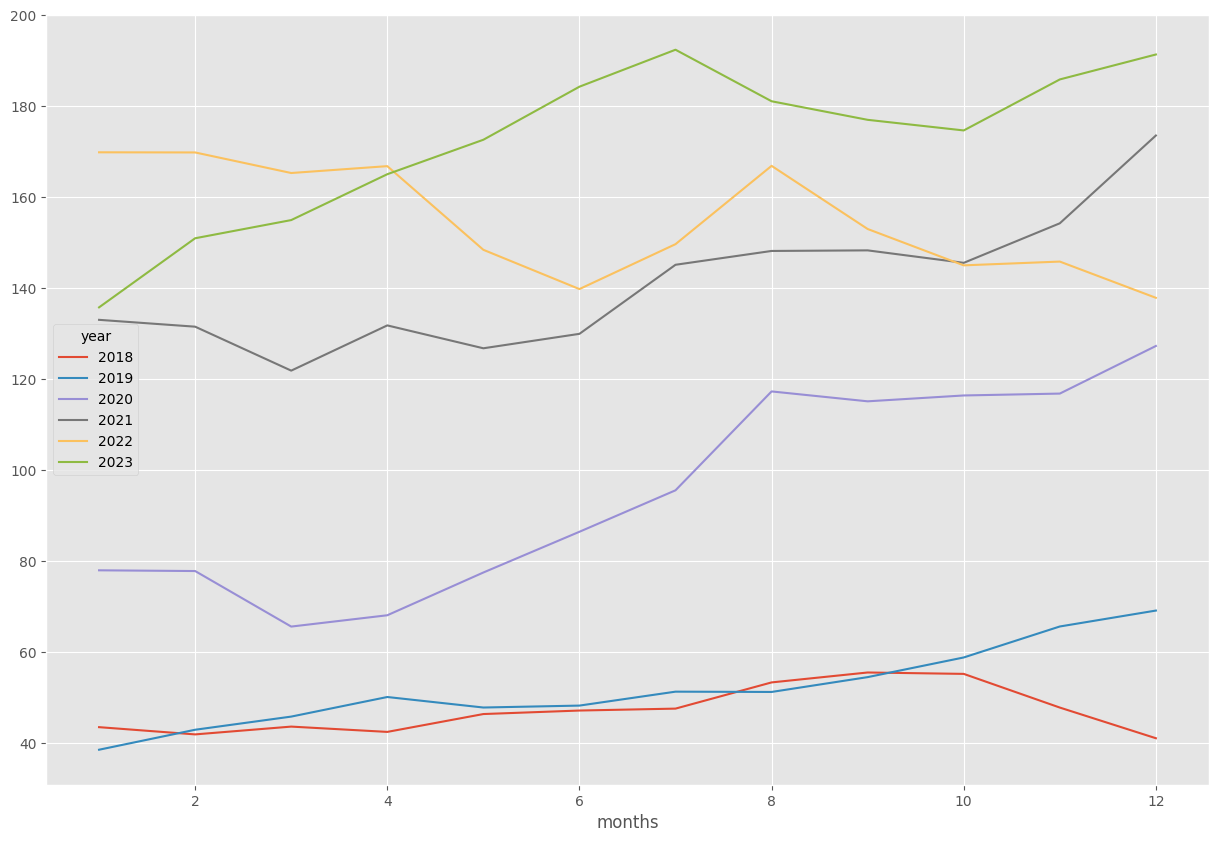

In [177]:
stockPivot.plot()

array([[<Axes: xlabel='months'>, <Axes: xlabel='months'>,
        <Axes: xlabel='months'>, <Axes: xlabel='months'>],
       [<Axes: xlabel='months'>, <Axes: xlabel='months'>,
        <Axes: xlabel='months'>, <Axes: xlabel='months'>],
       [<Axes: xlabel='months'>, <Axes: xlabel='months'>,
        <Axes: xlabel='months'>, <Axes: xlabel='months'>],
       [<Axes: xlabel='months'>, <Axes: xlabel='months'>,
        <Axes: xlabel='months'>, <Axes: xlabel='months'>]], dtype=object)

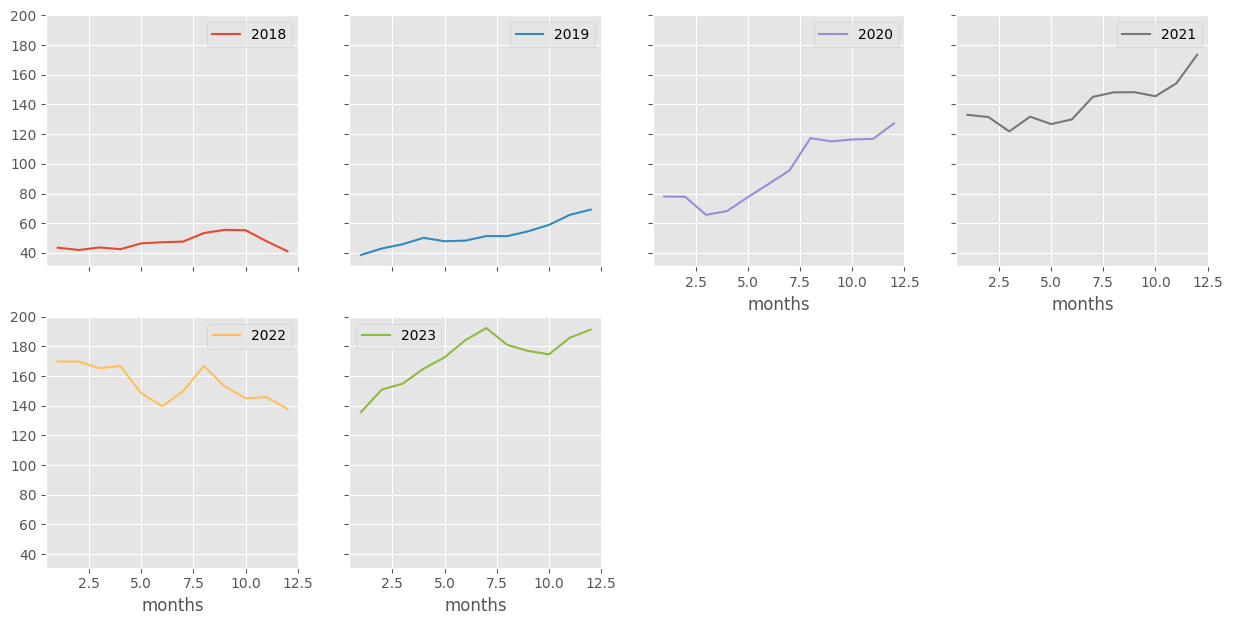

In [178]:
stockPivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)


<Axes: ylabel='Frequency'>

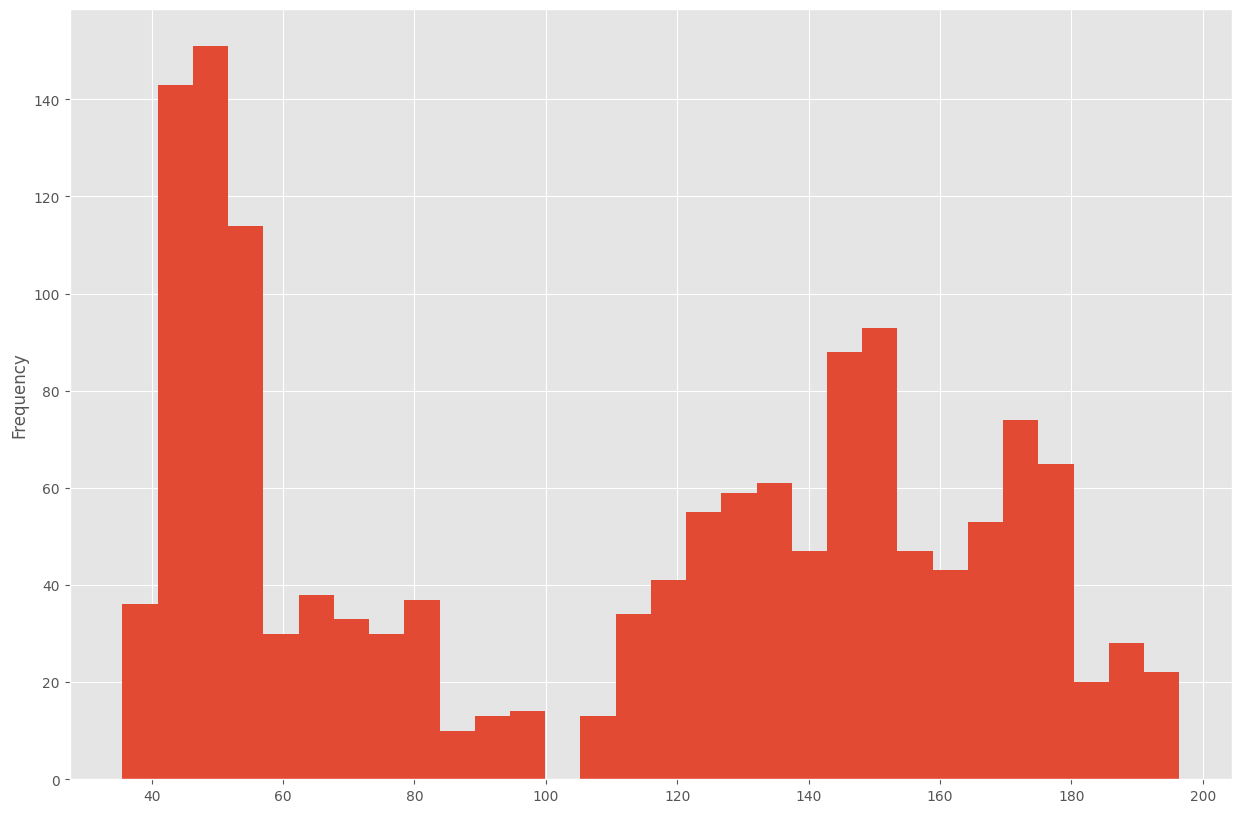

In [179]:
stock.loc[TIMEFRAME].Close.plot(kind = "hist", bins = 30)


In [180]:
stock["Closelog"] = np.log(stock.Close)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Closelog
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,-2.053010
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,-2.106591
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,-2.182822
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,-2.158372
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,-2.129792


<Axes: ylabel='Frequency'>

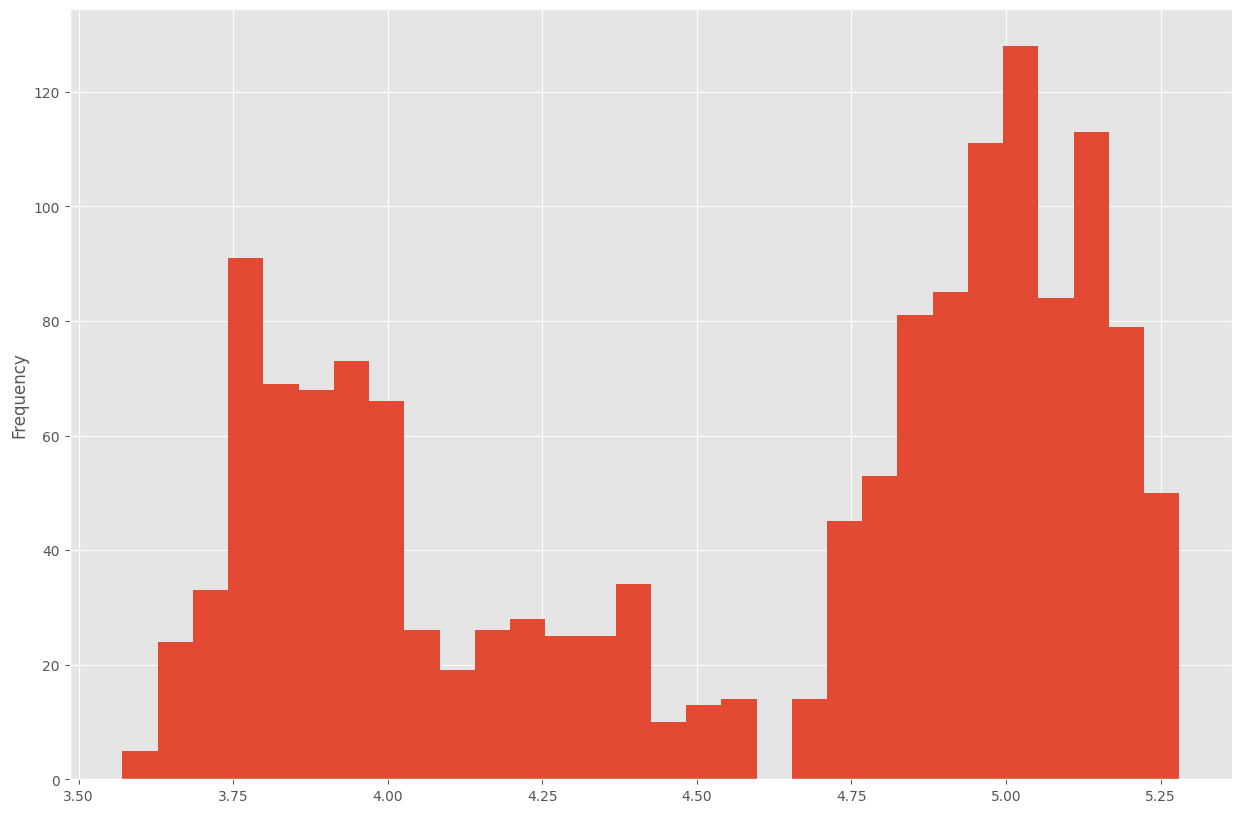

In [181]:
stock.loc[TIMEFRAME].Closelog.plot(kind = "hist", bins = 30)

<Axes: >

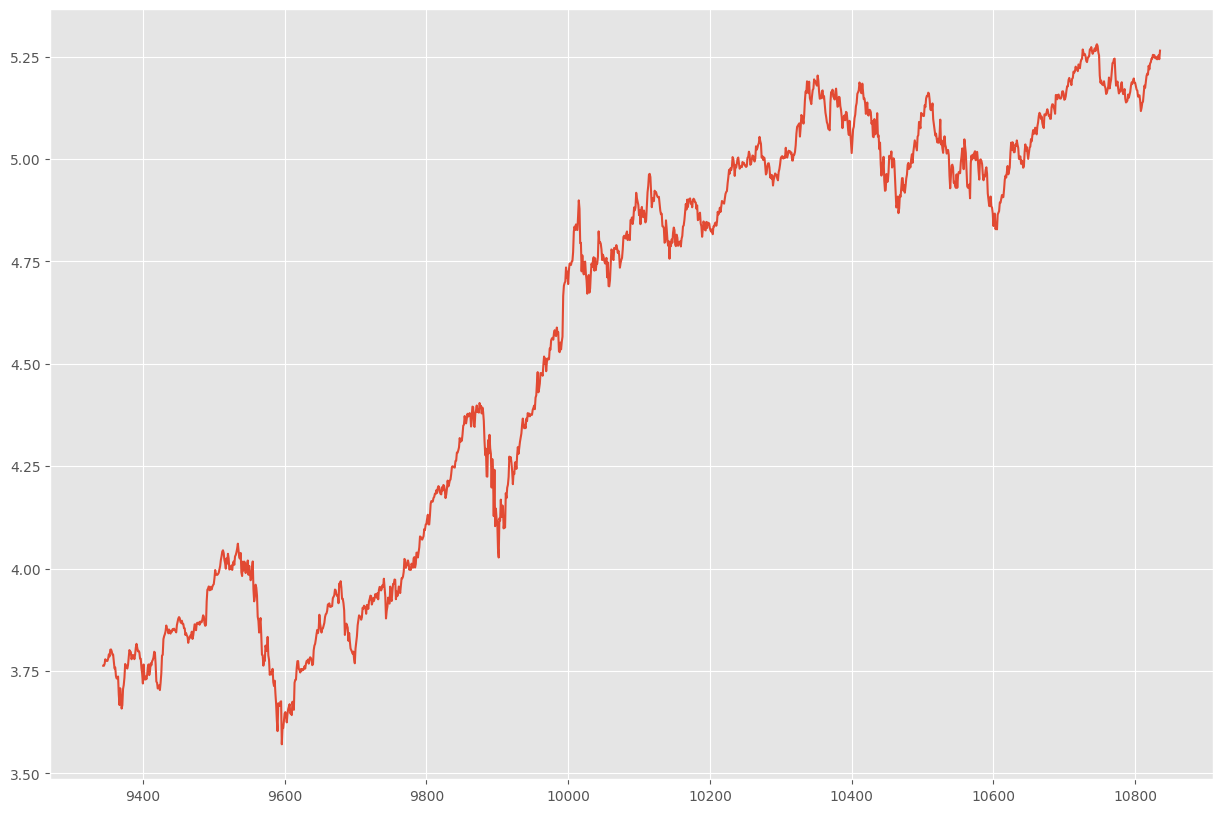

In [182]:
stock.loc[TIMEFRAME].Closelog.plot()

<Axes: xlabel='Date'>

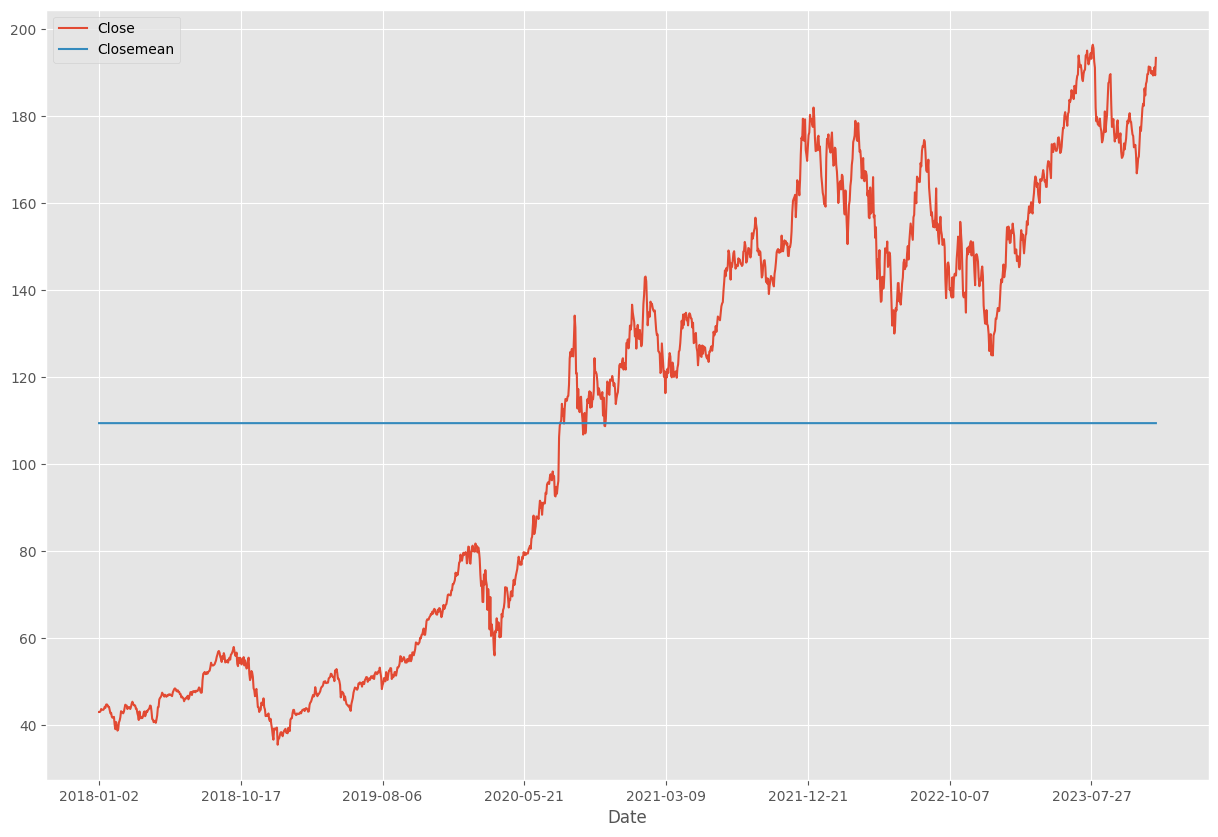

In [183]:
stock["Closemean"] = stock.loc[TIMEFRAME].Close.mean()
stock.loc[TIMEFRAME].plot(kind="line", x="Date", y = ["Close", "Closemean"])

In [184]:
from sklearn import linear_model
x = np.arange(stock.loc[TIMEFRAME].shape[0]).reshape((-1,1))
y = stock.loc[TIMEFRAME].Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

<Axes: xlabel='Date'>

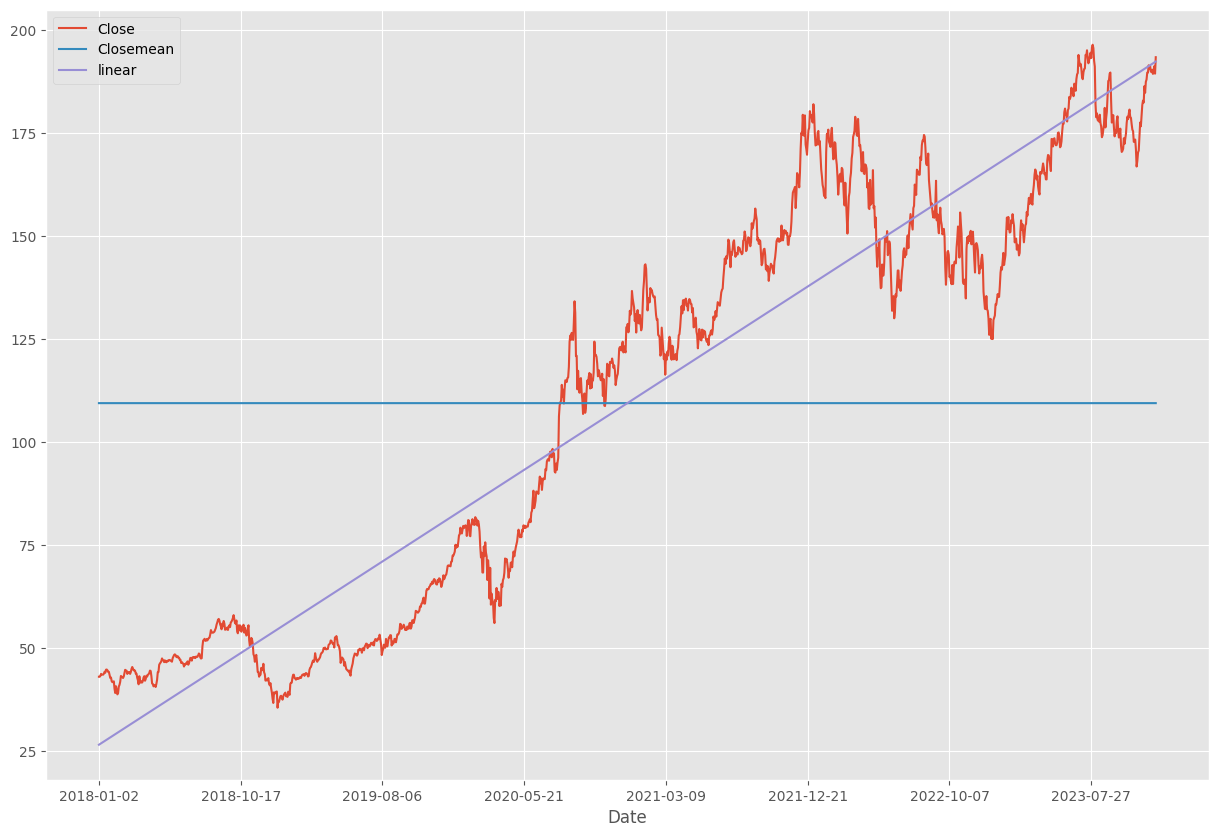

In [185]:
stock.loc[TIMEFRAME, 'linear'] = pred
stock.loc[TIMEFRAME].plot(kind="line", x="Date", y = ["Close", "Closemean", "linear"])

In [189]:
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f
Date_f,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08


In [187]:
stock_date = stock.loc[TIMEFRAME].copy()

In [188]:
stock_date["Date_f"] = pd.DatetimeIndex(stock_date.Date)
stock_date.drop(columns=["Date"],inplace=True)
stock_date.index = pd.PeriodIndex(stock_date.Date_f, freq='D')
stock_date = stock_date.sort_values(by = "Date_f")
stock_date.head()


ValueError: 'Date_f' is both an index level and a column label, which is ambiguous.

In [190]:
stock_date['timeIndex']= stock_date.Date_f - stock_date.Date_f.min()
stock_date["timeIndex"] =stock_date["timeIndex"] / np.timedelta64(1, 'D')
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex
Date_f,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02,0.0
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03,1.0
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04,2.0
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05,3.0
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08,6.0


In [191]:
stock_date["timeIndex"] = stock_date["timeIndex"].round(0).astype(int)
stock_date.tail()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex
Date_f,,,,,,,,,,,
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,5.243703,109.466573,191.920979,2023-11-29,2157
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,5.246761,109.466573,192.032178,2023-11-30,2158
2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,5.253529,109.466573,192.143378,2023-12-01,2159
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,5.244020,109.466573,192.254577,2023-12-04,2162
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700,5.264864,109.466573,192.365777,2023-12-05,2163


In [192]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [193]:
model_linear = smf.ols('Closelog ~ timeIndex', data = stock_date).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Closelog   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:              lun., 25 nov. 2024   Prob (F-statistic):               0.00
Time:                        19:08:04   Log-Likelihood:                 420.41
No. Observations:                1492   AIC:                            -836.8
Df Residuals:                    1490   BIC:                            -826.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6971      0.009    391.136      0.000       3.679       3.716
timeIndex      0.0008   7.57e-06    106.176      0.000       0.001       0.001
==============================================================================
Omnibus:                      663.390   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.284
Skew:                           0.059   Prob(JB):                     6.08e-18
Kurtosis:                       1.877   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
model_linear.params

Intercept    3.697069
timeIndex    0.000804
dtype: float64

In [195]:
model_linear_pred = model_linear.predict()
model_linear_pred.shape

(1492,)

In [196]:
stock_date['linear_stats'] = model_linear_pred
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex,linear_stats
Date_f,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02,0,3.697069
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03,1,3.697873
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04,2,3.698677
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05,3,3.699480
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08,6,3.701891


<Axes: xlabel='timeIndex'>

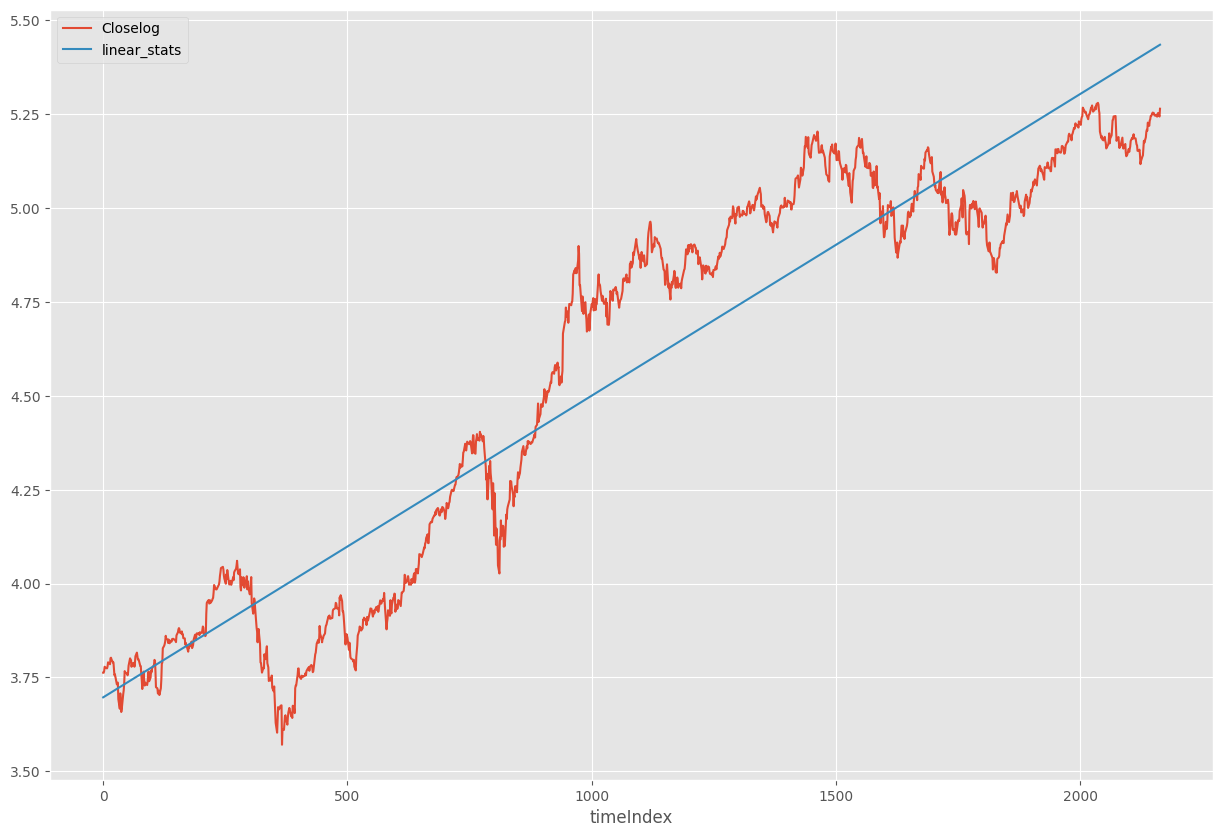

In [197]:
stock_date.plot(kind="line", x="timeIndex", y = ["Closelog", 'linear_stats'])

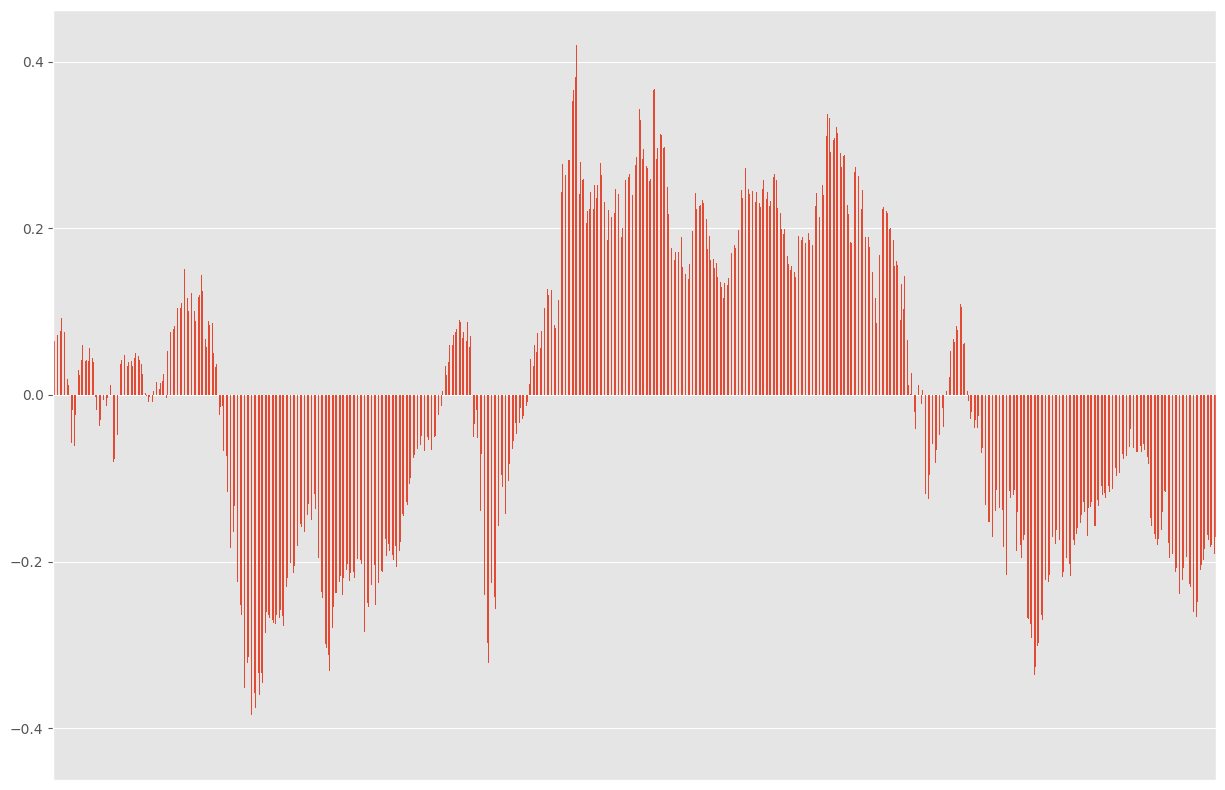

In [198]:
model_linear.resid.plot(kind = "bar").get_xaxis().set_visible(False)


In [199]:
stock_date['pricelinear'] = np.exp(model_linear_pred)
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex,linear_stats,pricelinear
Date_f,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02,0,3.697069,40.328940
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03,1,3.697873,40.361362
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04,2,3.698677,40.393811
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05,3,3.699480,40.426286
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08,6,3.701891,40.523866


<Axes: xlabel='timeIndex'>

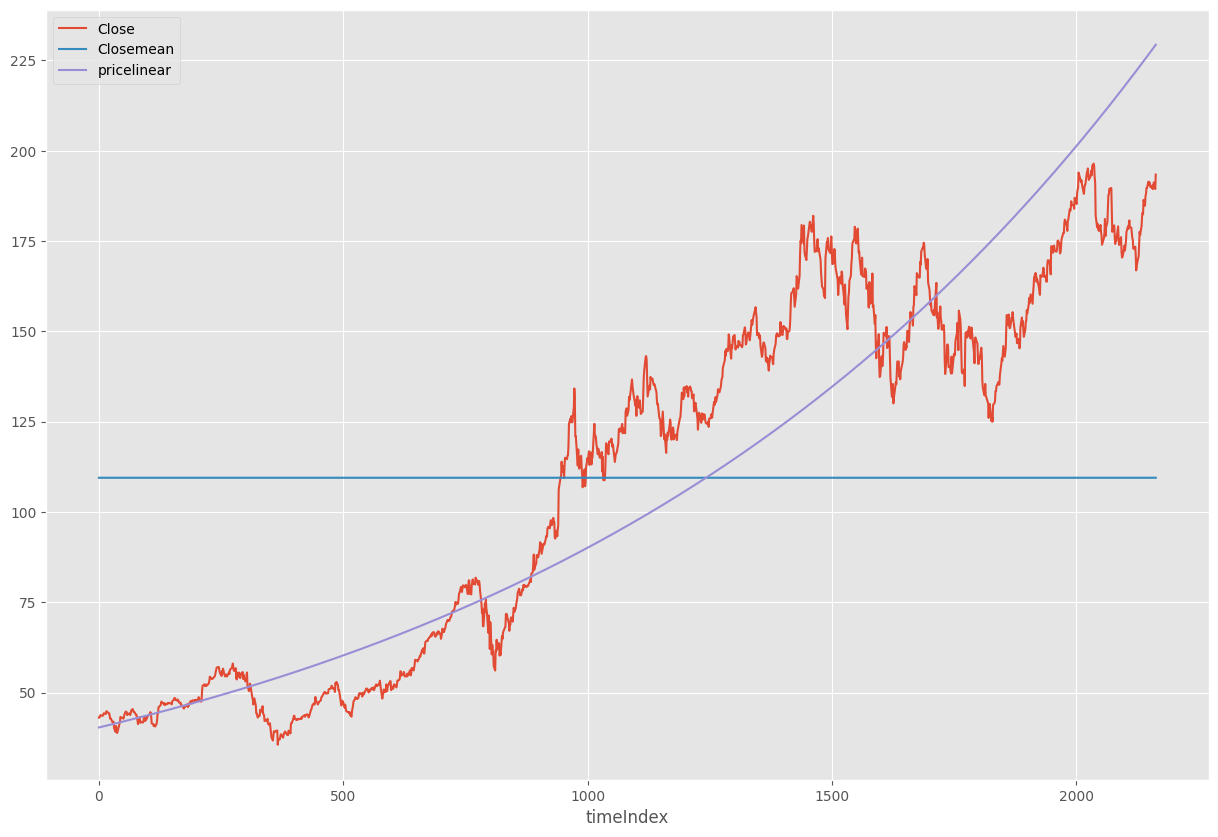

In [200]:
stock_date.plot(kind="line", x="timeIndex", y=["Close", "Closemean", "pricelinear"])

In [201]:
stock_date["CloselogShift1"] = stock_date.Closelog.shift()
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex,linear_stats,pricelinear,CloselogShift1
Date_f,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02,0,3.697069,40.328940,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03,1,3.697873,40.361362,3.762711
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04,2,3.698677,40.393811,3.762536
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05,3,3.699480,40.426286,3.767171
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08,6,3.701891,40.523866,3.778492


<Axes: xlabel='CloselogShift1', ylabel='Closelog'>

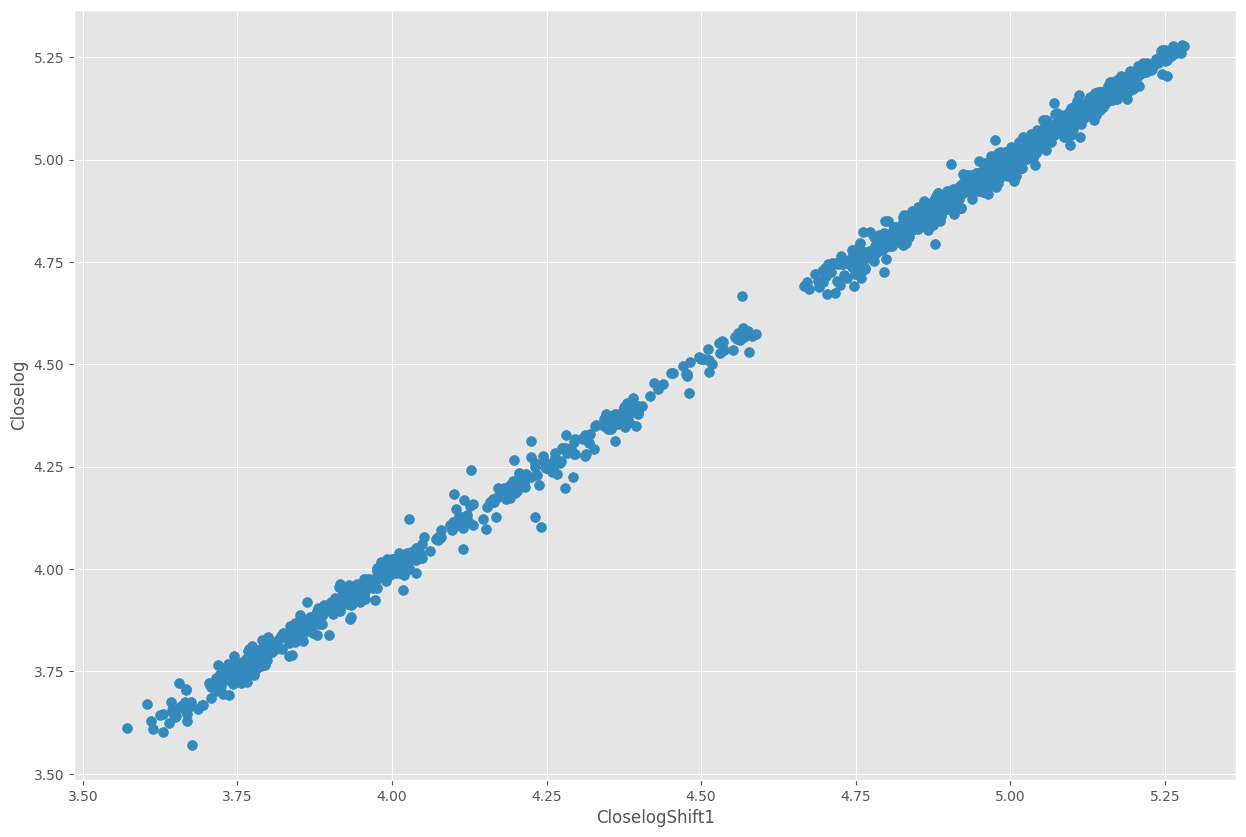

In [202]:
stock_date.plot(kind= "scatter", y = "Closelog", x = "CloselogShift1", s = 50)

<Axes: xlabel='Date_f'>

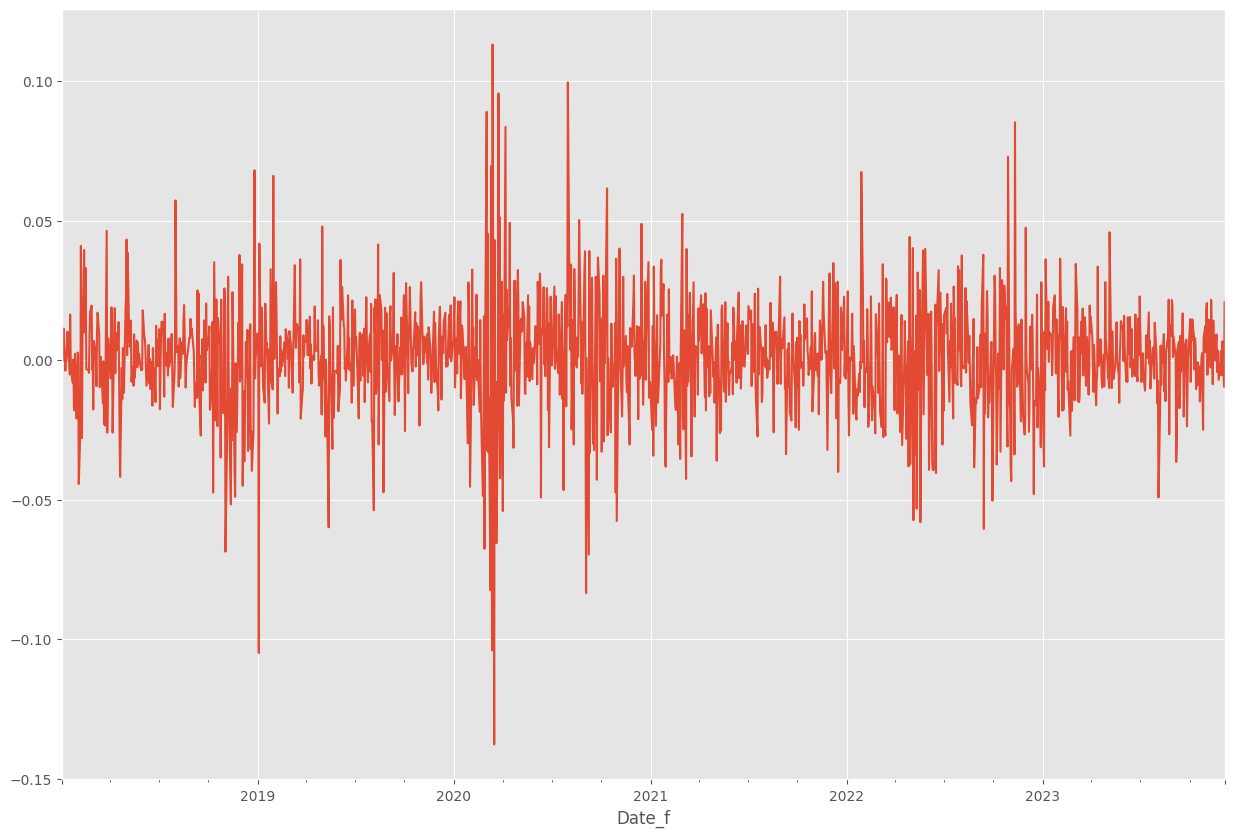

In [203]:
stock_date["CloselogDiff"] = stock_date.Closelog - stock_date.CloselogShift1
stock_date.CloselogDiff.plot()

In [204]:
stock_date["CloseRandom"] = np.exp(stock_date.CloselogShift1)
stock_date.head()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloseRandom
Date_f,,,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600,3.762711,109.466573,26.567370,2018-01-02,0,3.697069,40.328940,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,3.762536,109.466573,26.678570,2018-01-03,1,3.697873,40.361362,3.762711,-0.000174,43.064999
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904903,89738400,3.767171,109.466573,26.789769,2018-01-04,2,3.698677,40.393811,3.762536,0.004634,43.057499
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370617,94640000,3.778492,109.466573,26.900969,2018-01-05,3,3.699480,40.426286,3.767171,0.011321,43.257500
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200,3.774770,109.466573,27.012168,2018-01-08,6,3.701891,40.523866,3.778492,-0.003721,43.750000


In [205]:
def adf(st):
    rolmean = st.rolling(12).mean()
    rolstd = st.rolling(12).std()

    orig = plt.plot(st.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(st, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

<Axes: xlabel='Date_f'>

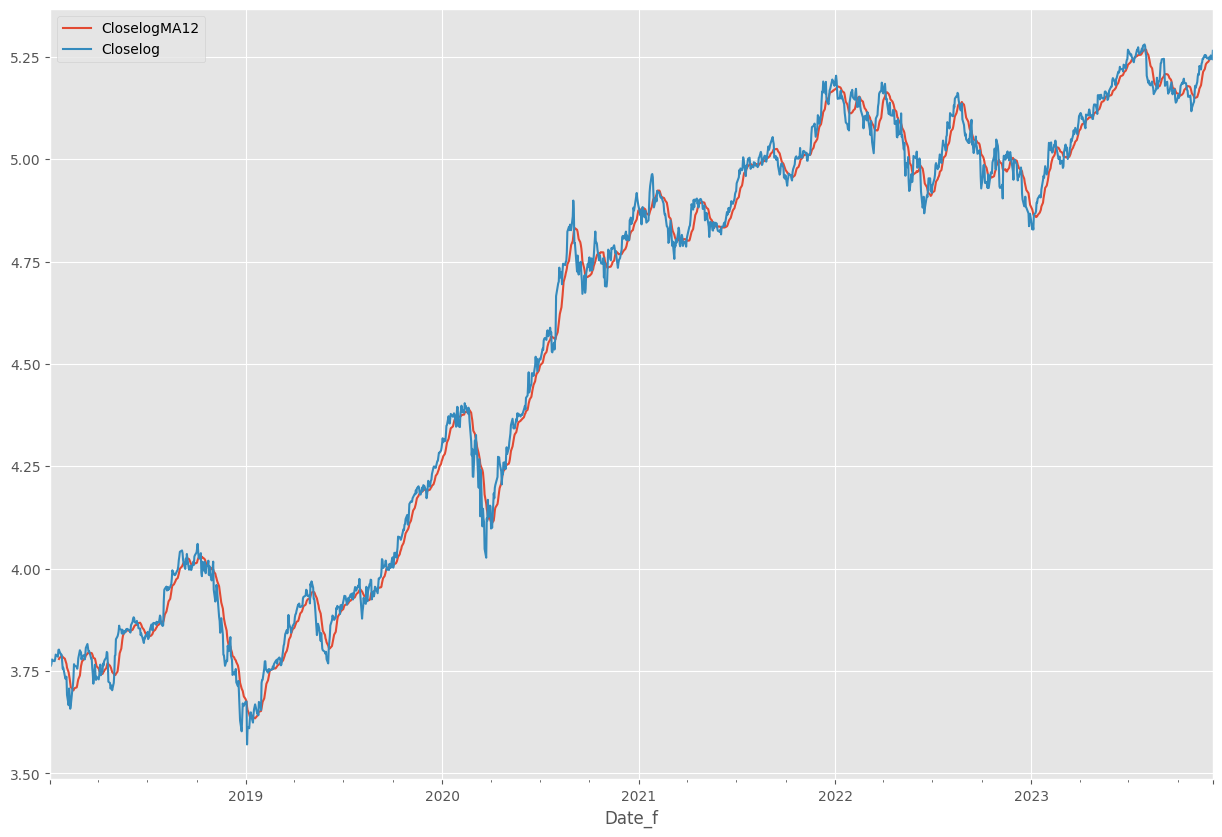

In [206]:
stock_date['CloselogMA12'] = stock_date.Closelog.rolling(12).mean()
stock_date.plot(kind ="line", y=["CloselogMA12", "Closelog"])

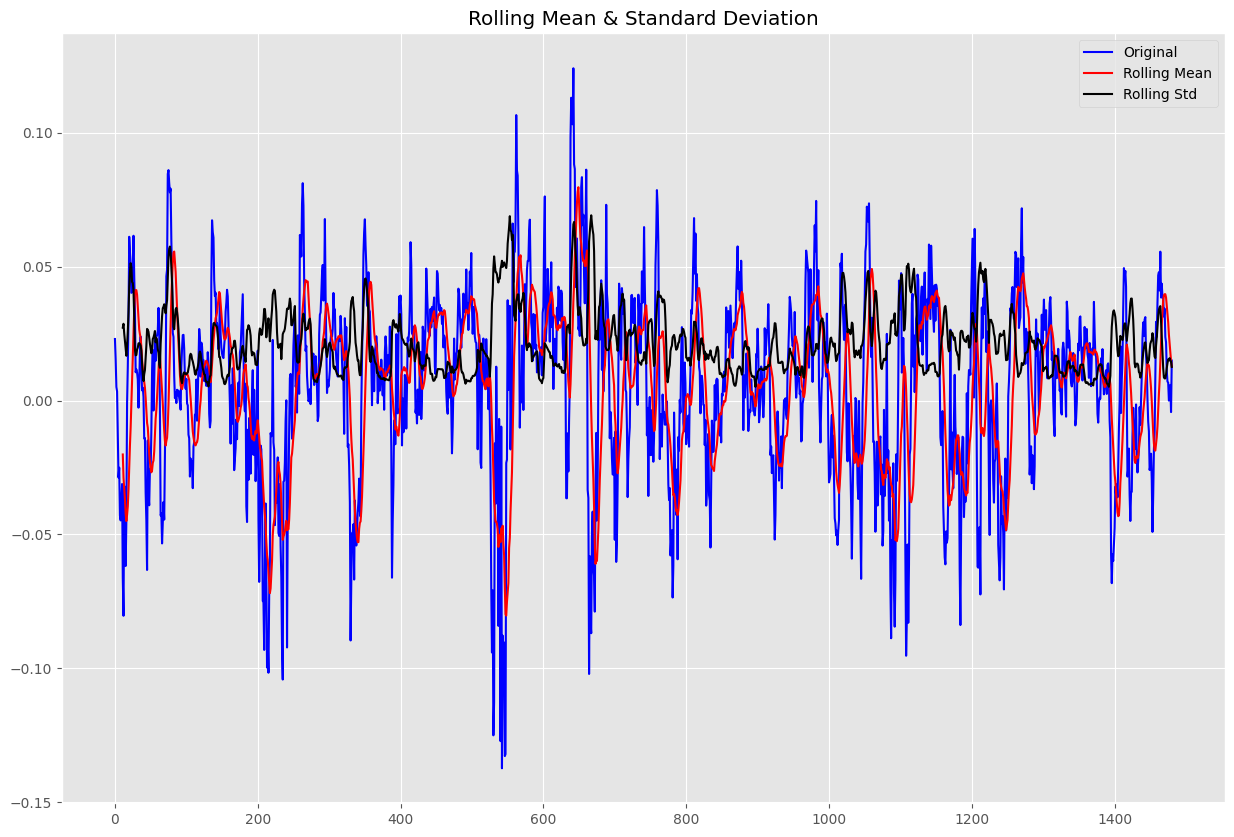

Test Statistic                -8.008123e+00
p-value                        2.238935e-12
# of Lags Used                 1.100000e+01
Number of Observations Used    1.469000e+03
Critical Value (1%)           -3.434809e+00
Critical Value (5%)           -2.863510e+00
Critical Value (10%)          -2.567819e+00
dtype: float64

In [207]:
st = stock_date.Closelog - stock_date.CloselogMA12
st.dropna(inplace = True)
adf(st)

Therefore, the data is stationary based on the results of this Augmented Dickey-Fuller (ADF) test.

In [208]:
half_life = 12
1 - np.exp(np.log(0.5)/half_life)

0.05612568731830647

In [209]:
stock_date['CloselogExp12'] = stock_date.Closelog.ewm(halflife = half_life).mean()

<Axes: xlabel='Date_f'>

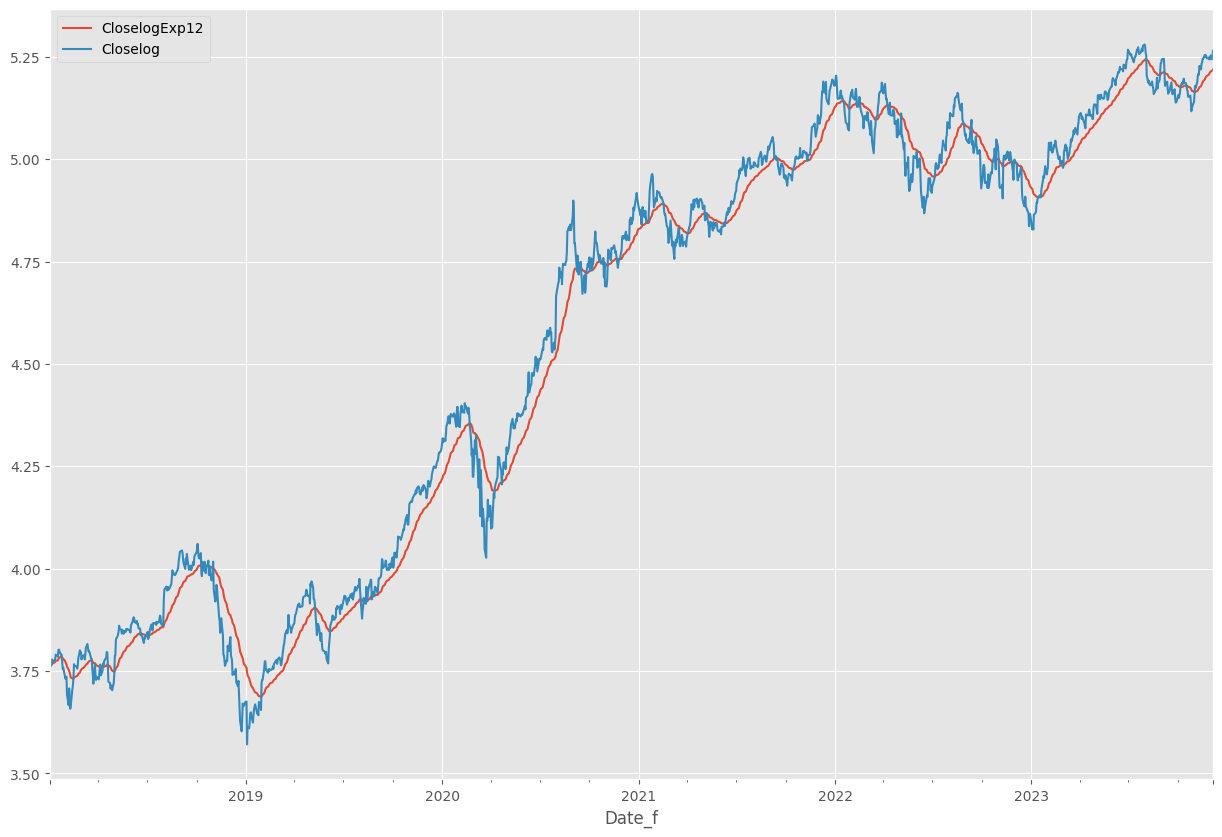

In [210]:
stock_date.plot(kind ="line", y=["CloselogExp12", "Closelog"])

In [211]:
stock_date["CloseExp12"] = np.exp(stock_date.CloselogExp12)
stock_date.tail()

,Open,High,Low,Close,Adj Close,Volume,Closelog,Closemean,linear,Date_f,timeIndex,linear_stats,pricelinear,CloselogShift1,CloselogDiff,CloseRandom,CloselogMA12,CloselogExp12,CloseExp12
Date_f,,,,,,,,,,,,,,,,,,,
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,5.243703,109.466573,191.920979,2023-11-29,2157,5.430496,228.262455,5.249127,-0.005424,190.399994,5.243720,5.210373,183.162286
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,5.246761,109.466573,192.032178,2023-11-30,2158,5.431300,228.445967,5.243703,0.003058,189.369995,5.246010,5.212415,183.536743
2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,5.253529,109.466573,192.143378,2023-12-01,2159,5.432103,228.629626,5.246761,0.006768,189.949997,5.247683,5.214722,183.960756
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500,5.244020,109.466573,192.254577,2023-12-04,2162,5.434514,229.181491,5.253529,-0.009510,191.240005,5.248310,5.216367,184.263495
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66371700,5.264864,109.466573,192.365777,2023-12-05,2163,5.435318,229.365742,5.244020,0.020844,189.429993,5.249924,5.219089,184.765732


<Axes: xlabel='timeIndex'>

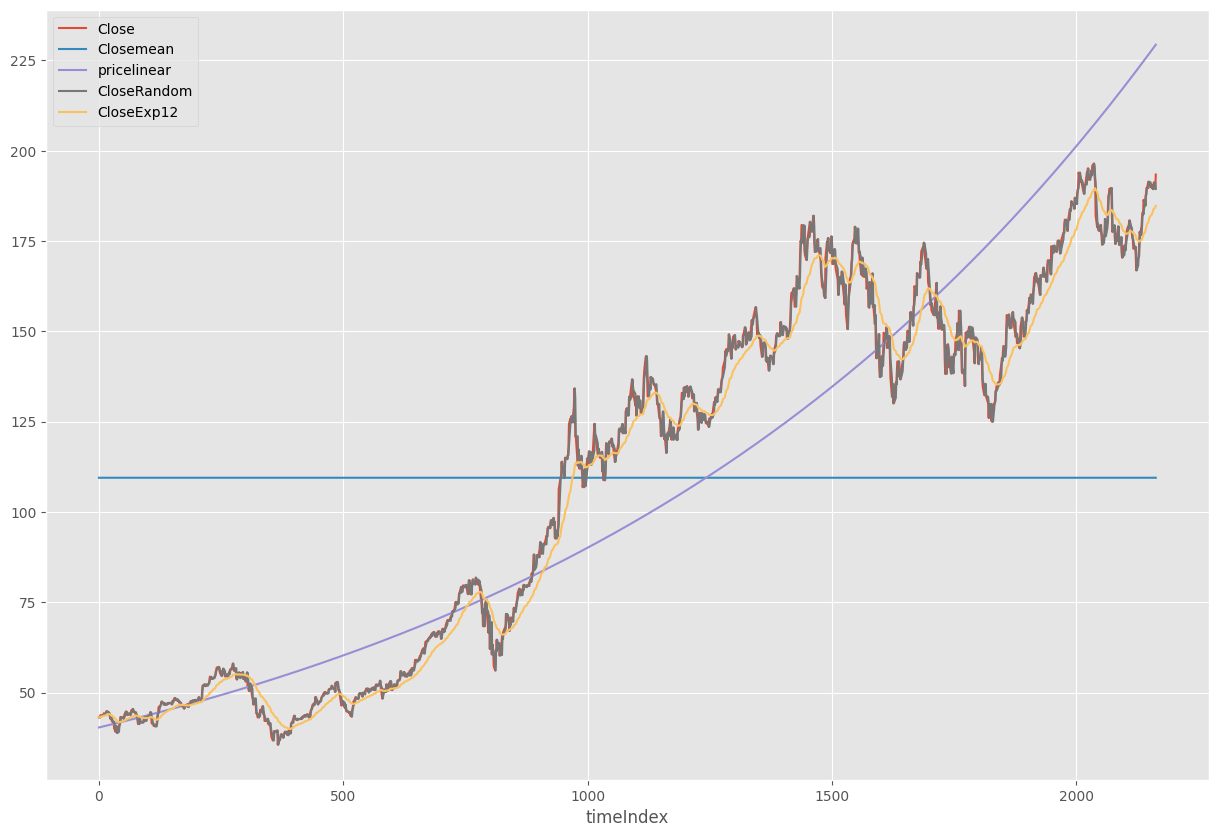

In [212]:
stock_date.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "pricelinear", 
                                             "CloseRandom", "CloseExp12"])

In [222]:
stock_date = stock_date.asfreq('D')
stock_date.index = stock_date.index.to_timestamp()


In [223]:
print(stock_date.index)


DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05'],
              dtype='datetime64[ns]', name='Date_f', length=1492, freq=None)


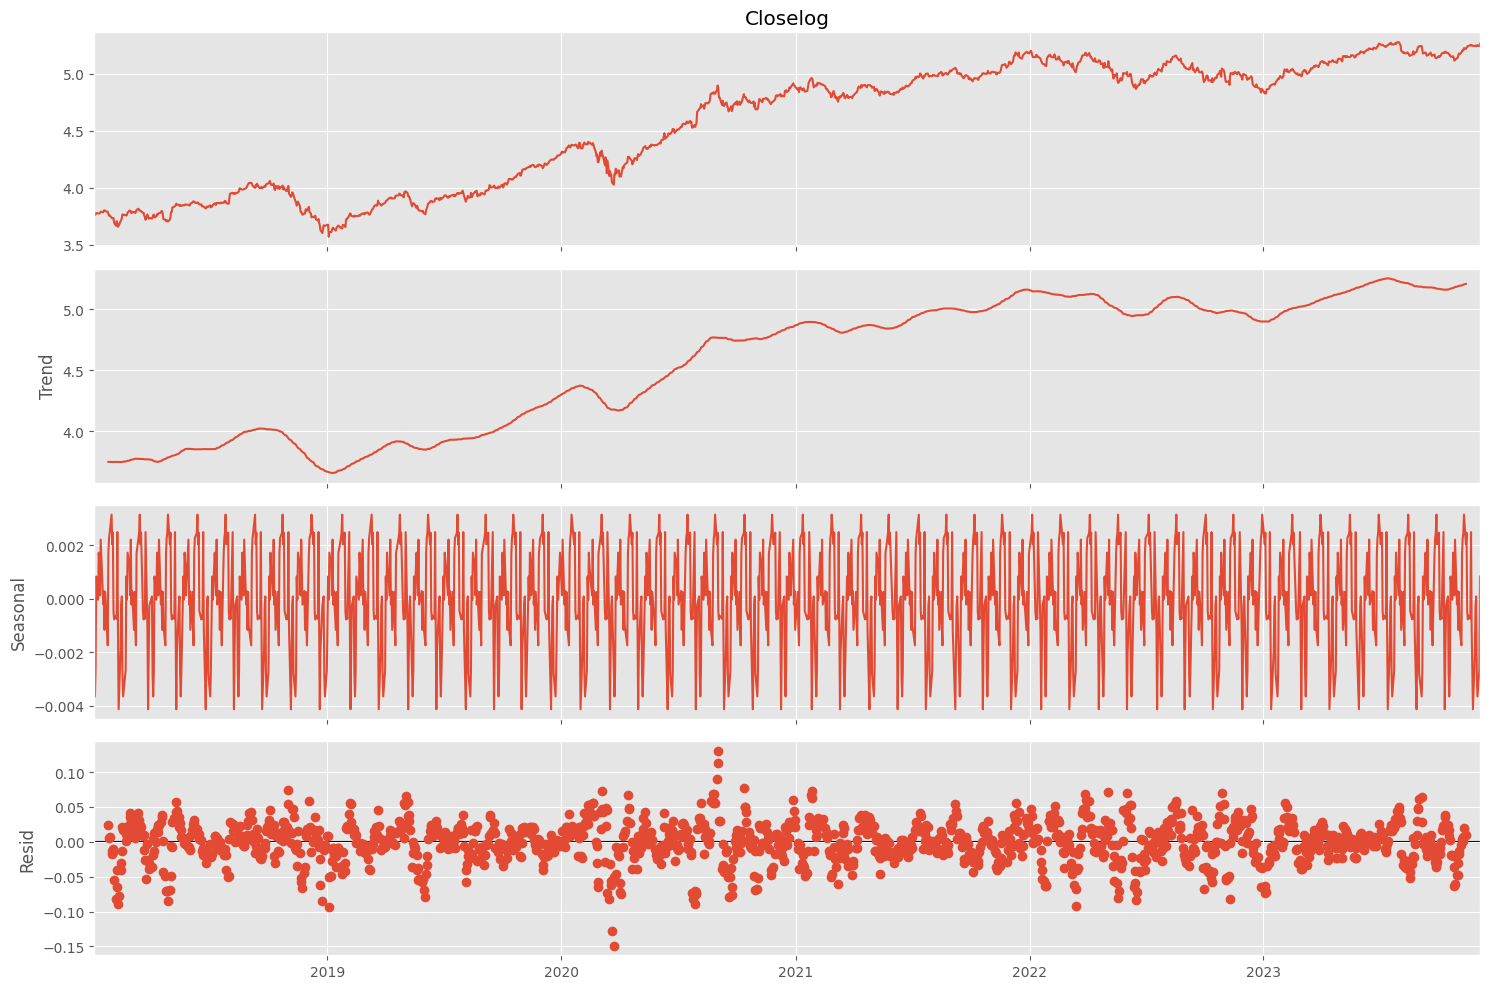

In [229]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(stock_date['Closelog'],period=31)
fig = decomposition.plot()